<h1> Analyzing Top Salaries in Computer Science: Who Earns the Most? </h1>
    by Almamy Bah and Oscar Herrera
    
<h2> Introduction </h2> 

After graduating, a sizable percentage of undergraduate students join the workforce without having a basic understanding of the earning potential of their learned talents. This is especially true for those studying computer science who aren't sure what career path to take. It is crucial that these students have access to trustworthy information about the financial possibilities for various career pathways, including data science, cyber security, and software engineering, as compensation is one of the most crucial aspects in employment selection.
By using the data science pipeline to examine the available data, our goal is to give computer science students the greatest financial options possible. Through an examination of average pay for various job titles, degrees of expertise, and organizations, we will look into how to maximize their earning potential. Furthermore, by investigating which states offer the best incomes for a certain degree, we will examine how geography influences income. We will also look at non-job-related variables like ethnicity, gender, and educational attainment that could have an ongoing impact on income.
By providing comprehensive and accurate information, our aim is to assist computer science students in making informed decisions about their future career paths and maximizing their earning potential. Ultimately, we believe that this will help to create a more equitable and prosperous job market for all computer science graduates.

Our first null hypothesis is that
Our second is that


<h1> Data Collection </h1>
Data Collection:
For this step, we looked for a dataset that is related to the salary of computer science jobs. More specifically, we look into a dataset from Kaggle related to Data Science and Stem Salaries. It contains more than 62,000 salary records from top companies. It contains useful data such as gender, race, level of experience, base salary etc… that we think is enough for our tutorial. The data set can be found <a href= https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries> here </a>.




First we will import the libraries we will use for the project:

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

db = pd.read_csv("final_data.csv")
db.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


Next, we will get rid of the columns containing extraneous data for our project

In [6]:
db = db.drop("yearsatcompany", axis=1)
db = db.drop("tag", axis=1)
db = db.drop("cityid", axis=1)
db = db.drop("otherdetails", axis=1)
db = db.drop("dmaid", axis=1)
db = db.drop("rowNumber", axis=1)
db = db.drop("Masters_Degree", axis=1)
db = db.drop("Bachelors_Degree", axis=1)
db = db.drop("Doctorate_Degree", axis=1)
db = db.drop("Highschool", axis=1)
db = db.drop("Some_College", axis=1)
db = db.drop("Race_Asian", axis=1)
db = db.drop("Race_White", axis=1)
db = db.drop("Race_Two_Or_More", axis=1)
db = db.drop("Race_Black", axis=1)
db = db.drop("Race_Hispanic", axis=1)

print(db)

                timestamp     company     level                         title  \
0       6/7/2017 11:33:27      Oracle        L3               Product Manager   
1      6/10/2017 17:11:29        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53:57      Amazon        L7               Product Manager   
3       6/17/2017 0:23:14       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58:51   Microsoft        60             Software Engineer   
...                   ...         ...       ...                           ...   
62637   9/9/2018 11:52:32      Google        T4             Software Engineer   
62638   9/13/2018 8:23:32   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35:59        MSFT        63             Software Engineer   
62640  9/16/2018 16:10:35  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12:59       apple      ict3             Software Engineer   

       totalyearlycompensat

<h1>This should be removed right?</h1>
<h1> Data Processing </h1>

Now we will remove rows containing null values for gender and race.

In [7]:
dbf_gender = db[db['gender'].isnull() == False]

dbf_race = db[db['Race'].isnull() == False]

print(dbf_race)


                 timestamp   company                level  \
6921     6/1/2019 20:54:48  Facebook                  IC5   
8366     7/2/2019 16:43:16     Intel              Grade 7   
10937   9/15/2019 20:11:14   Comcast           Engineer 2   
11997  10/13/2019 11:43:20     Latch              Manager   
14429  12/30/2019 11:16:12    Intuit  Software Engineer 1   
...                    ...       ...                  ...   
61982    3/9/2021 17:03:07    Google                  L10   
61984   3/25/2021 10:45:03    Zapier                   L8   
61986   5/14/2021 13:30:43    Amazon                   L8   
61987   5/18/2021 15:34:21  Facebook                   D1   
61991   7/30/2021 22:23:24  Facebook                   E9   

                              title  totalyearlycompensation  \
6921               Product Designer                   310000   
8366              Hardware Engineer                   200000   
10937             Software Engineer                   103000   
11997  Soft

<h2> Data cleaning </h2> 
Now we will see where we have a lot of missing data through the following graph. This will allows us to have a better
understaning of how to handle missing data in our project.


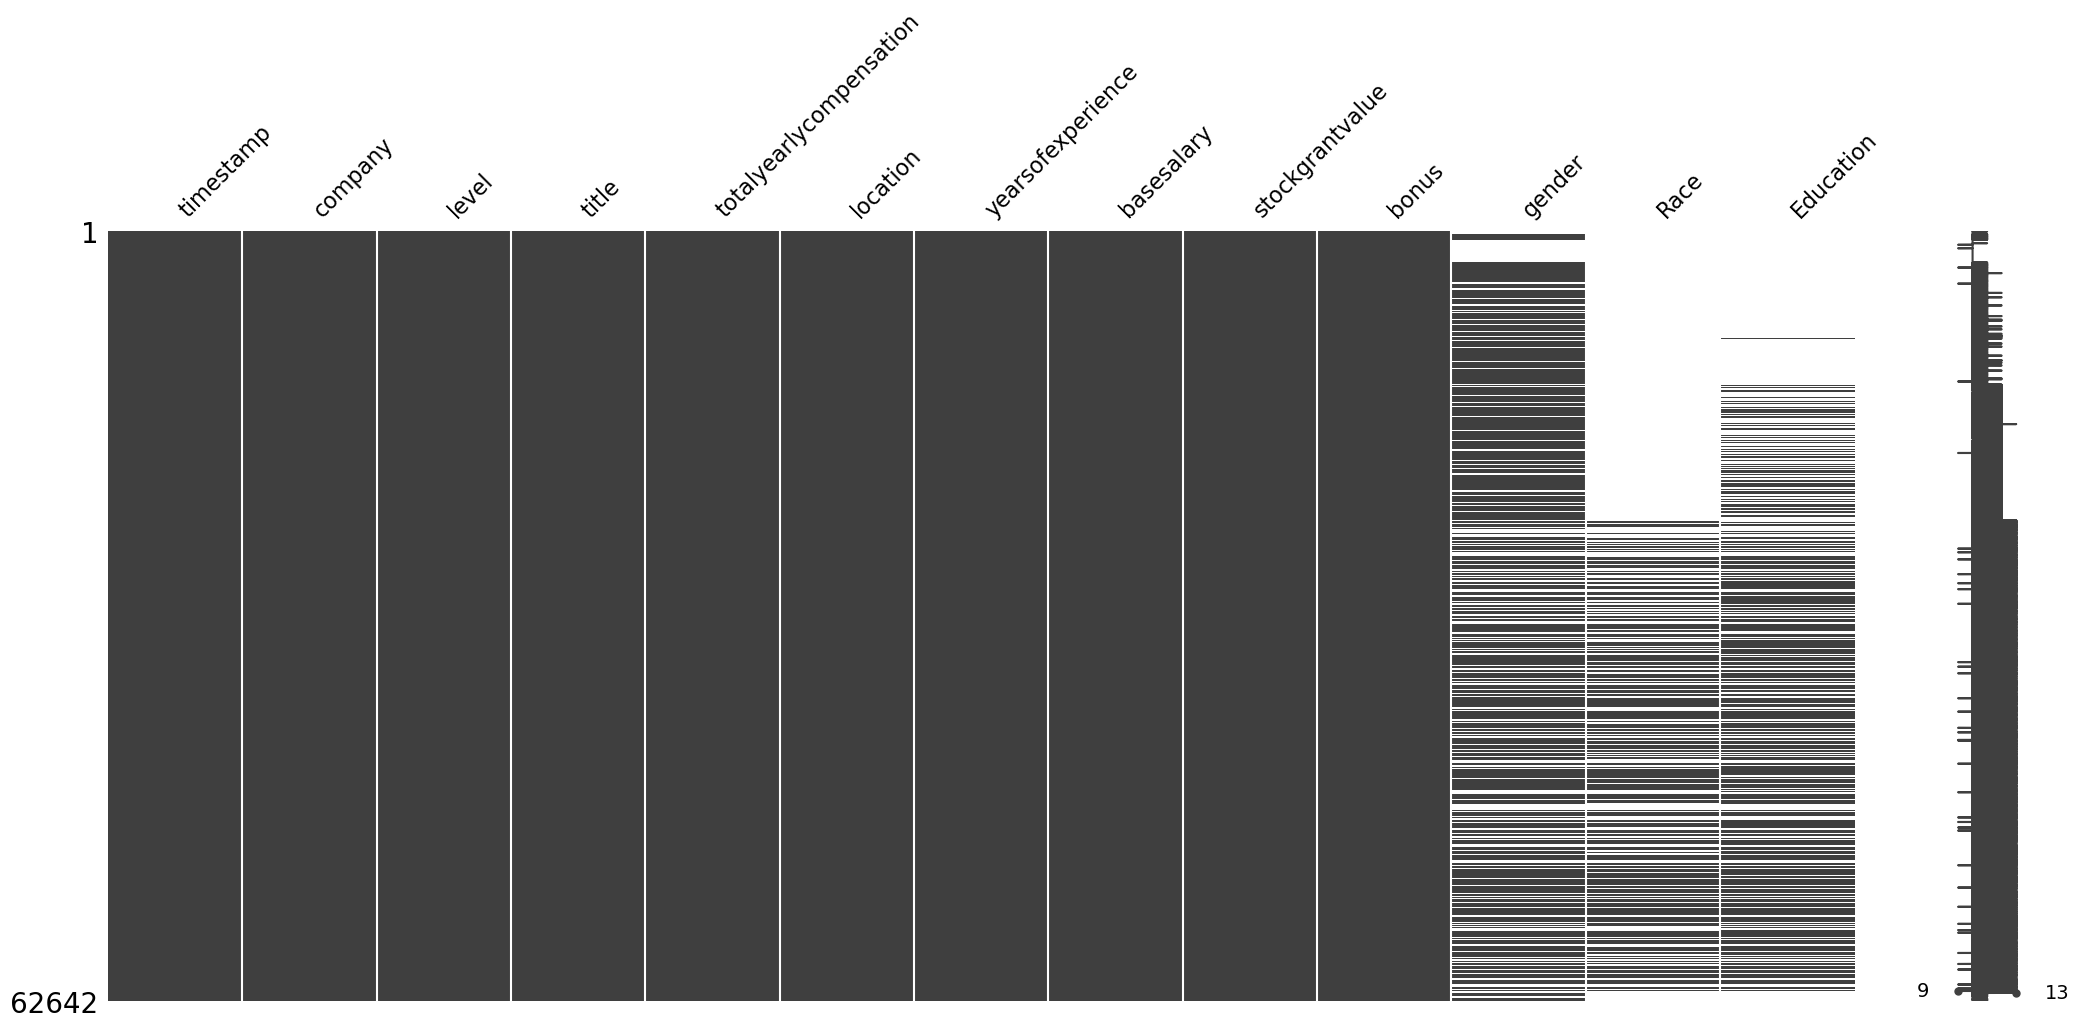

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Race                       40215
Education                  32272
dtype: int64

In [8]:
import missingno as msno
msno.matrix(db)
plt.show()
db.isna().sum() 

As you can see, we have a decent amount of missing data. Specially at the gender, education and Race column. Getting rid of all the rows with missing information might bias our sample and lead to variance larger than reflected by the size of our data. From our understanding, this data is not missing completely at randomn. Therefore we will fill it using imputation technique.


<h3> Filling Gender Missing Values</h3>

In [9]:
# Finding the different type of genre
db['gender'].unique()


array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

We are only interested in male and female genders. Therefore we will clean the gender column data and replace the other types of gender found above with nan before using imputation to replace those Nan values by either male or female

In [10]:
# Replacing all non male/female gender by nan
for index, row in db.iterrows():
    
    if(row['gender']!='Male' and row['gender']!='Female'):
        
        db.loc[index, 'gender']= np.nan
        
# Now we fill in the row with either Male or female

genders = ['Male', 'Female']

db['gender'] = db['gender'].apply(lambda x: random.choice(genders) if pd.isna(x) else x)

db.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,107000.0,20000.0,10000.0,Female,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,0.0,0.0,0.0,Male,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,155000.0,0.0,0.0,Male,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,157000.0,180000.0,35000.0,Female,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,0.0,0.0,0.0,Male,NaN,NaN


<h3> Filling Race Missing Values</h3>

In [11]:
# Finding the different type of Race
db['Race'].unique()


array([nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic'],
      dtype=object)

In [12]:
# Now we will remove the 'two or more' category

for index, row in db.iterrows():
    
    if(row['Race'] == 'Two Or More'):
        
        db.loc[index, 'Race']= np.nan


#Filling the Nan rows with a random race

genders = ['White', 'Asian', 'Black', 'Hispanic']

db['Race'] = db['Race'].apply(lambda x: random.choice(genders) if pd.isna(x) else x)

db.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,107000.0,20000.0,10000.0,Female,White,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,0.0,0.0,0.0,Male,White,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,155000.0,0.0,0.0,Male,Hispanic,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,157000.0,180000.0,35000.0,Female,Hispanic,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,0.0,0.0,0.0,Male,Asian,NaN


<h3> Filling education Missing Values </h3>

In [13]:
db['Education'].unique()


array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College',
       'Highschool'], dtype=object)

In [14]:
# Now we fill in the null rows with a random race

genders = ['PhD', 'Master\'s Degree', 'Bachelor\'s Degree', 'Some College', 'Highschool']

db['Education'] = db['Education'].apply(lambda x: random.choice(genders) if pd.isna(x) else x)

db.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,107000.0,20000.0,10000.0,Female,White,Highschool
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,0.0,0.0,0.0,Male,White,Some College
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,155000.0,0.0,0.0,Male,Hispanic,Some College
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,157000.0,180000.0,35000.0,Female,Hispanic,Master's Degree
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,0.0,0.0,0.0,Male,Asian,Master's Degree


In [15]:
# Finding out how much Nan value left now
db.isna().sum()

timestamp                    0
company                      5
level                      119
title                        0
totalyearlycompensation      0
location                     0
yearsofexperience            0
basesalary                   0
stockgrantvalue              0
bonus                        0
gender                       0
Race                         0
Education                    0
dtype: int64

Even though some columns such as level still have missing data, the amount is insignificant and therefore there is no need to replace the missing data.

<h2> Exploratory analysis and Data visualization </h2>

This phase of the our project process involves further exploration of the data through visualizations and statistical analyses. The goal is to gain a better understanding of the data and to identify any patterns or trends that may be useful for making interpretations.


<h3>I)First, let's determine which states offer the highest salariesfor computer science jobs, and has the highest number of workers.</h3>

In [16]:
# First we modify the location column to contain only regions inside the United States.

us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
#us_data = df[df['location'].str[-2:].isin(us_states)]

for index, row in db.iterrows():
    if row['location'][-2:] in us_states:
        db.loc[index,'location'] = row['location'][-2:]
    else:
        db.loc[index,'location'] = np.nan


db.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,CA,1.5,107000.0,20000.0,10000.0,Female,White,Highschool
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,CA,5.0,0.0,0.0,0.0,Male,White,Some College
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,WA,8.0,155000.0,0.0,0.0,Male,Hispanic,Some College
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,CA,7.0,157000.0,180000.0,35000.0,Female,Hispanic,Master's Degree
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,CA,5.0,0.0,0.0,0.0,Male,Asian,Master's Degree


Next, we are finding the average salary per state.

In [17]:
#gathering information on average salary per state.
state_mean_salary = db.groupby('location')['totalyearlycompensation'].mean()

#add a new column to out database where the new column contains the average salary per state
db = pd.merge(db, state_mean_salary, how='left', left_on='location', right_on='location')
db.rename(columns={'totalyearlycompensation_y': 'average_salary'}, inplace=True)



Let's visualize it through a map of the US to have a better understanding of it.
To do so, we need US state geometry data as a GeoDataFrame.That information can be obtained at <a href=https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html>US State Geometry Data</a>

In [18]:
import plotly.express as px

# Create a Choropleth map using Plotly
fig = px.choropleth(db,
                    locations= 'location',
                    locationmode='USA-states',
                    scope='usa',
                    color='average_salary',
                    title='Average Salaries by State',
                    color_continuous_scale='Viridis',
                    width=1000, height=500
                    
                    
                   )

# fig.show()

ModuleNotFoundError: No module named 'plotly'

Finding the 15 states that has the highest amount of workers

In [ ]:
plt.figure(figsize=(10,8))
db["location"].value_counts().iloc[:15].plot(kind="bar", color="green")
plt.title("Amount of workers per State", size=17)
plt.xlabel("States", size=23)
plt.ylabel("Amount of Workers", size=23)
plt.xticks(rotation=90)
plt.show()


From these 2 visualization, we can cleary see that the highest paying jobs are in the East cost such as in CA and Seattle. It is also were most of those workers are located.

<h3>Next, we are going to explore and analyze the data to see how much factores such as education, job title, race and gender, affect their earnings

<h3>A. Education:</h3> To achieve this, we are going to make box plot with the education and total yearly compensation data and see how much people with different education level are earning.
    


In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(x="Education", y="totalyearlycompensation_x", data=db, errorbar=None)
plt.title('Salary per education level', fontsize=20)
plt.xlabel("Education", size=20)
plt.ylabel("Salary", size=23)
plt.show()



<h4>Observation:</h4>
    The plot shows that Ph.D. and Master's degree holders earn the highest salaries, which is expected given the amount of education required to obtain those degrees. However, it is concerning to see that Bachelor's degree holders earn less than those with just some college education or a high school degree. This suggests that having a Bachelor's degree in CS may not necessarily lead to higher earnings compared to those without a degree. As a college student, this is worrying as we invest a significant amount of time and money into obtaining a degree that may not necessarily translate into higher salaries in the field. I

<h3>Race</h3>

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="Race", y="totalyearlycompensation_x", data=db, errorbar=None)
plt.title('Salary according to race', fontsize=20)
plt.xlabel("Education", size=20)
plt.ylabel("Salary", size=30)
plt.show()

<h4>Observation:</h4>
Even though black people seems to earn little less compared to the others, there is overall no big disparity between differnt races.

<h3>Gender</h3>


In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="gender", y="totalyearlycompensation_x", data=db, errorbar=None)
plt.title('Salary according to gender', fontsize=30)
plt.xlabel("Education", size=20)
plt.ylabel("Salary", size=23)
plt.show()

<h4>Observation:</h4>There is not much disparity between different gender in the tech field. However, there is a lot more male than female in the sector.

In [ ]:
db.corr()

In [ ]:
db["timestamp"] = pd.to_datetime(db["timestamp"]).dt.date
db["year"] = pd.DatetimeIndex(db['timestamp']).year
db["year"].value_counts()
px.histogram(db, x = "year", color = "gender" ,barmode = "group",title="Amount of Worker per Gender"
            ,labels = {"year":"Year","gender":"Gender"})

<h2>Hypothesis Testing, & Machine Learning</h2>


We want to determine if there is a significant difference in the salaries of people with a Master's degree versus those with a Bachelor's degree. Our null hypothesis is that there is no significant difference in salaries between people who have a Master's degree and those who have a Bachelor's degree. The alternative hypothesis is that there is a significant difference in salaries between them.

To do so, we will find the t-statistic, which is a measure of the difference between two groups' means relative to the variation within the group, and the p-value, which is a probability value that measures the evidence against the null hypothesis.

In [ ]:

from scipy import stats
#Getting the rows containing people with Master and Bachelor degrees
master=db[db['Education'] =='Master\'s Degree']
bachelor=db[db['Education'] =='Bachelor\'s Degree']

# Computing the mean salary for each group
mean_master = master['totalyearlycompensation_x'].mean()
mean_bachelor= bachelor['totalyearlycompensation_x'].mean()

# Compute the variance and sample size for each group
var_master=master['totalyearlycompensation_x'].var()
size_master=master['totalyearlycompensation_x'].count()

var_bachelor=bachelor['totalyearlycompensation_x'].var()
size_bachelor=bachelor['totalyearlycompensation_x'].count()

# Find the t-statistic
t= (mean_master - mean_bachelor)/((var_master/size_master) +(var_bachelor/ size_bachelor)) **0.5

# Finding the degree of freedon
df=size_master + size_bachelor -2

# Calculate the p-value
p_value= stats.t.sf(abs(t), df) *2


print('Average Master Salary:', mean_master)
print('Average Bachelor Salary:', mean_bachelor)
print('Variance Master :', var_master)
print('Variance Bachelor Salary:', var_bachelor)
print('Number of Master holder:', size_master)
print('Number of Bachelor holder:', size_bachelor)
print('T-statistic is:', t)
print('The p_value is:', p_value)




Based on the results, we can conclude that there is a significant difference in the average salary between Master's degree holders and Bachelor's degree holders in the given dataset. The t-statistic is 21.60 and the p-value is 6.70e-103, which is much lower than the significance level of 0.05. This means that we can reject the null hypothesis that there is no significant difference in the average salary between the two groups, and we can conclude that there is a significant difference in the average salary between the two groups. Furthermore, the average salary for Master's degree holders is higher than that of Bachelor's degree holders in the given dataset.

<h2>Machine Learning</h2>
Here,We will use machine learning algorithm more specifically linear regression to predict salary of sofware engenier salary based on their years of experience. 
Linear regression is a machine learning algorithm that tries to find a linear relationship between the input features and the target variable. In our case, the input feature is years of experience and the target variable is salary.

First, let's preprocess the data

In [ ]:
# filter the dataset for software engineer job titles
db_sw= db[db['title'] == 'Software Engineer']

# Only keeping columns that we will use for the algorithm
db_sw= db_sw[['yearsofexperience','totalyearlycompensation_x']]

db['title'].unique()

Next, we need to split the data into training and testing sets 

In [ ]:
from sklearn.model_selection import train_test_split

X = db_sw[['yearsofexperience']]
y= db_sw['totalyearlycompensation_x']

# calling the function that split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling the data

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Xtrain = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

After that, we are going to train the linear regression model on the training data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Predict the salaries for the testing data
y_pred = model.predict(X_test)

df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1

Finally, we can evaluate the model on our testing data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = db['yearsofexperience'].values.reshape(-1,1)
y = db['totalyearlycompensation_x'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. In this case, the MSE is 16250301297.700195, which means that on average, the predicted salary is off by about $127,496 from the actual salary.

The R^2 score measures the proportion of the variance in the dependent variable (salary) that is predictable from the independent variable (years of experience). In this case, the R^2 score is 0.18440726892640957, which means that only about 18% of the variability in salaries can be explained by years of experience.



<h2> Final Thoughts </h2>
Through our analysis and modeling of the data, we have found that the number of years of experience in a company does not necessarily translate to higher earnings. This could explain the trend of recent graduates frequently changing jobs in pursuit of better salaries. Additionally, our examination of the dataset has revealed a significant issue with gender and ethnic diversity in higher-paying positions. The dataset confirmed a commonly held belief that those who earn the highest salaries are predominantly white males. Conducting a larger sample of various salary data could be beneficial in addressing these concerns. Conducting a more extensive sample on various salary data could help us gain a better understanding of the root cause of this concerning issue. However, the power of data science lies in its ability to explore complex topics and provide insights that drive informed actions in the future. Therefore, we must continue to investigate and address the underlying causes of these trends to create a more equitable and inclusive workplace for all.